## 1. Метод половинного деления

**Метод бисекции или метод половинного деления** — простейший численный метод для решения нелинейных уравнений вида *f(x)=0*. Предполагается только непрерывность функции *f(x)*. Поиск основывается на теореме о промежуточных значениях.

**Теорема о промежуточном значении (или Теоре́ма Больца́но — Коши́)** утверждает, что если непрерывная функция, определённая на вещественном промежутке, принимает два значения, то она принимает и любое значение между ними.

**Математическая постановка задачи:** Дана монотонная, непрерывная функция *f(x)*, которая содержит корень/ни на отрезке *[a,b]*, где *b>a* и. 
Определить корень/ни *f(x) = 0* с точностью *?*, если известно, что *f(a)f(b)<0*

**Алгоритм**

1. Найдем середину отрезка *[a; b]*: *c=(a+b)/2*;

2. Вычислим значения функции в точках *a* и *c* и найдем произведение полученных значений: *d=f(c)?f(a)*;

3. Если *d>0*, то теперь точкой a станет *c: a=c*; Если *d<0*, то точкой *b* станет *c: b=c*;

4. Вычислим разность *a* и *b*, сравним ее с точностью *?*: если *|a-b|> ?*, то идем в пункт *1*. если нет, то корень с нужной нам точностью найден, и он равен: *x=(a+b)/2*;

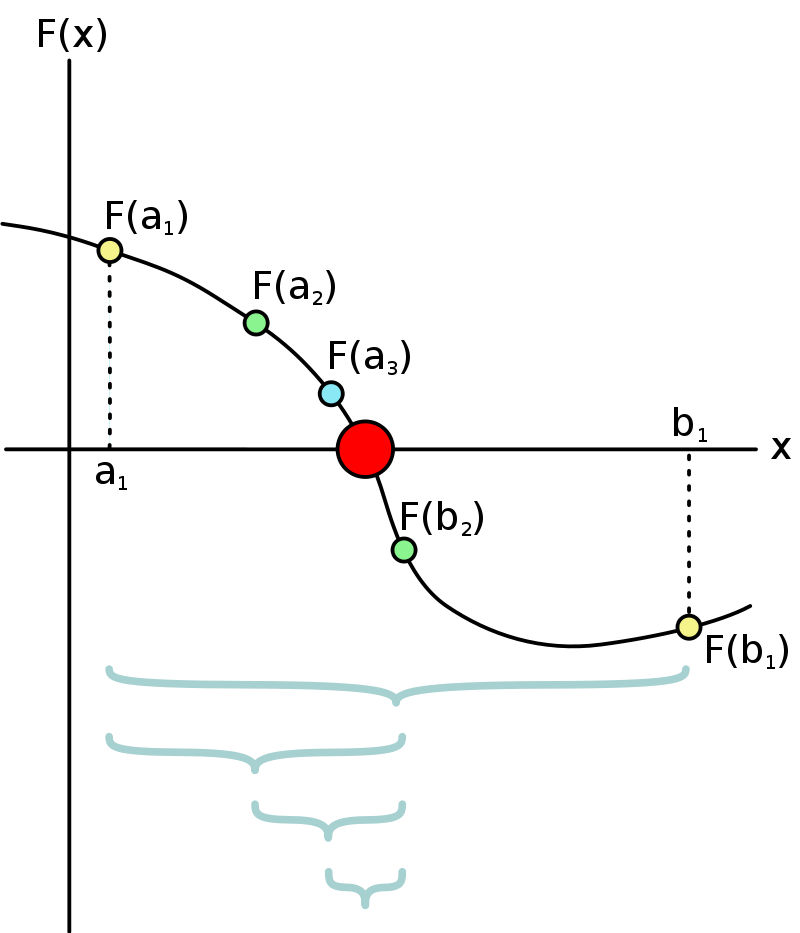

### Реализация метода

In [76]:
def func(x):
    return ((x-3)**3)*(x-2)*(x+7)

In [77]:
import random

In [78]:
def initNums():
    x0 = random.randint(-1000, 1000)
    x1 = random.randint(-800, 800)

    while func(x0)*func(x1) >= 0:
        x0 = random.randint(-1000, 1000)
        x1 = random.randint(-800, 800)
    return [x0,x1]

In [79]:
def dih(func, iters):
    eps = 0.0001
    roots = []
    inits = initNums()
    x0 = inits[0]
    x1 = inits[1]
    
    for _ in range(iters):

        x2 = (x0+x1)/2

        if abs(x1 - x0) < eps:
            rx2 = round(x2)
            if (rx2 not in roots):
                roots.append(rx2)
            else:
                inits = initNums()
                x0 = inits[0]
                x1 = inits[1]

        if func(x0)*func(x2) < 0:
            x1 = x2
            #print(str(x1) + " ")
        else:
            x0 = x2
            #print(str(x0) + " ")
    return roots

In [80]:
print(dih(func, 30000))

[-7, 3, 2]


Отлично! все корни нашли. Попробуем функцию посложнее

In [81]:
def func1(x):
    return ((x-99)**5)*((x+77)**3)*((x-9)**3)

In [82]:
print(dih(func1, 30000))

[99, -77, 312, -772, 9, 742, -573, 96, 761, -507, -211, -634, -399, 28, 623, 194, 303, -586, 653, 30, -757, -325, 438, 87, -8, 349, 289, -300, -28, -381, 729, -427, -39, -58, 703, 484, -575, -66, -775, 35, -198, 59, 183, 617, -9, -324, -469, -97, 327, -63, -229, 364, 475, 737, -499, -185, -519, -26, -363, 54, -46, 404, 98, -559, 490, 513, -38, 354]


Тут уже получается ерунда. И связано это c тем, что мы проверяем условие *abs(x1 - x0) < eps* То есть не насколько мы близки в корню, а насколько прошлое значение переменной отличается от настоящего. А в сложной функции, такой как *func1* легко и не дойти до корня, так как кривая пересекающая точку y=0 может быть почти параллельна оси Y. Можно проверять не толькр разность между найденными занчениями, но и будет ли функция при подстановке найденного значения стремиться к нулю.

In [107]:
def dih(func, iters):
    eps = 0.0001
    roots = []
    inits = initNums()
    x0 = inits[0]
    x1 = inits[1]
    
    for _ in range(iters):

        x2 = (x0+x1)/2

        if abs(x1 - x0) < eps:
            rx2 = round(x2)
            if (rx2 not in roots) and (func(rx2) == 0):
                roots.append(rx2)
            else:
                inits = initNums()
                x0 = inits[0]
                x1 = inits[1]

        if func(x0)*func(x2) < 0:
            x1 = x2
            #print(str(x1) + " ")
        else:
            x0 = x2
            #print(str(x0) + " ")
    return roots

In [108]:
print(dih(func1, 40000))

[99, -77, 9]


Теперь корнями считаются только значения близкие к истинным корням  даже очень сложные уравнения можно решить

In [109]:
def func2(x):
    return ((x-55)**10)*((x+11)**7)*((x-100)**8)

In [116]:
print(dih(func2, 40000000))

[-11, 100, 55]


Как видно, для очень сложных функций нужно очень много итераций. Простой питон без всяких дополнительных оптимизированных библиотек тут уже плохо справляется.

## 2. Метод простой итерации

Пусть дано уравнение *f(x) = 0*. Мы можем преобразовать его к виду *x = g(x)*, где *g(x)* подходит для решения по методу итераций. Если мы выберем начальное приближение *x0*, общее решение может быть найдено путем последовательного применения уравнения *x = g(x)* к *x0* до тех пор, пока последующие значения x не станут достаточно близки к точному решению.

**Математическая постановка задачи**: 

Дано:

Функция f(x), для которой мы хотим найти решение уравнения f(x) = 0.
Начальное приближение x₀.
Задача:

Найти такое значение x, которое делает функцию f(x) равной нулю, то есть решить уравнение f(x) = 0.
Метод простых итераций решает эту задачу, используя итеративную формулу:

x(n+1) = g(x_n),

где x(n+1) - новое приближение, x_n - предыдущее приближение, и g(x) - выбранная функция, которая приводит к сходимости к решению уравнения f(x) = 0.

Завершение процесса:
Процесс итераций продолжается до тех пор, пока не выполнится условие сходимости. Обычно это может быть определено, например, как |x(n+1) - x_n| < ε, где ε - некоторая заданная точность, определяющая, насколько близко мы хотим приблизиться к решению.

По формуле Лагранжа: x_истин - x_(n+1) = g(x_истин) - g(x_n) = g'(x_*)(x_истин - x_n), x_* принадлежит отрезку от x_истин - x_n, тогда чтобы решение сходилось, нужно, чтобы |g'(x_*)| < 1. 
А g'(x_*) = 0, если x_* = x_истин

### Реализация операции взятия корня

1. x = a^(1/2)
2. x^2 = a
3. 2x^2 = a + x^2
4. x = 0.5*(x+a/x) => x_(n+1) = 0.5*(x_n+a/x_n)

In [118]:
def square_root(a, epsilon=1e-6):
    x_n = a  
    while True:
        x_next = 0.5 * (x_n + a / x_n) 
        if abs(x_next - x_n) < epsilon:
            return x_next  
        x_n = x_next

In [122]:
a = 36
result = square_root(a)
print(result)

6.0
